~ using Python 3.12.3

# Searching the db via search query

In [ ]:
# File: /mnt/c/JakeDev/Portfolio/datalib_pg/api_test.ipynb
'''
searching the db via search query
'''
import requests
import json
import pprint
import pandas as pd
import numpy as np

# Parameters
query_sort = False
query = ''              # Allows you to search for a query. If blank, it will return all datasets/no filtering.
row_sort = True
rows = '1000'            # Only returns x number of datasets from the query results. Default = 10 Max = 1000
start = '0'             # Where to begin returning results. Will index into the query and pull results after start index.
include_drafts = False
include_deleted = False
include_private = False



if query_sort == True:
    query = f'&q={query}'
else:
    query = '&q=*:*'    # default value from documentation 

if row_sort == True:
    rows = f'&rows={rows}'
else:
    rows = '&rows=10'   # default value from documentation

start = f'&start={start}'
include_drafts = f'&include_drafts={include_drafts}'
include_deleted = f'&include_deleted={include_deleted}'
include_private = f'&include_private={include_private}'

request = requests.get(f'https://catalog.data.gov/api/3/action/package_search?{query}{rows}{start}{include_drafts}{include_deleted}{include_private}') # Contains all datasets with metadata for keywords, tags, etc.



'''
structure:

{
    "help": "string",                               //explains how to use the specific API endpoint
    "success": "boolean",                           //indicates if the request was successful
    "result": {
        "count": "integer",                         //total number of datasets returned
        "results": [                                // lists all of the datasets returned. each dataset is it's own dictionary.
            {
                'author': "string",                  //name of the author
                'author_email': "string",            //email of the author
                'creator_user_id': "string",         //user id of the creator
                'id': "string",                      //unique id of the dataset
                'isopen': "boolean",                 //indicates if the dataset is open
                'license_id': "string",              //license id of the dataset
                'license_title': "string",           //license title of the dataset
                'maintainer': "string",              //name of the maintainer
                'maintainer_email': "string",        //email of the maintainer
                'metadata_created': "string",        //date the dataset was created
                'metadata_modified': "string",       //date the dataset was modified
                'name': "string",                    //name of the dataset
                'notes': "string",                   //notes of the dataset
                'num_resources': "integer",          //number of resources in the dataset
                'num_tags': "integer",               //number of tags in the dataset
                'organization': "dictionary",        //contains organization id, name, title, type, description, image_url, created, is_organization, approval_satus, and state (active or inactive)
                'owner_org': "string",               //name of the owner organization
                'private': "boolean",                //indicates if the dataset is private
                'state': "string",                   //state of the dataset
                'title': "string",                   //title of the dataset
                'type': "string",                    //type of the dataset
                'url': "string",                     //url of the dataset
                'version': "string",                 //version of the dataset
                'extras': "list",                    //list of extras
                'groups': "list",                    //list of groups
            ->  'resources': "list of dictionaries", //list of resources (possible dataformats) IMPORTANT: this is the only way to get the url of the dataset.
               
                EXAMPLE:
                [
                {
                   "cache_last_updated": null,       //string of last update
                   "cache_url": null,                //string of cache url
                   "created": "2020-11-10T17:20:33.040452", //string of creation date
                   "description": "",                //string of description
            ->     "format": "CSV",                  //string of format
                   "hash": "",                       //string of hash
                   "id": "fa51be35-691f-45d2-9f3e-535877965e69", //string of id
                   "last_modified": null,            //string of last modified
                   "metadata_modified": "2020-11-10T17:20:33.040452", //string of metadata modified
                   "mimetype": "text/csv",           //string of mimetype
                   "mimetype_inner": null,           //string of mimetype inner
                   "name": "Comma Separated Values File", //string of name
                   "no_real_name": true,             //boolean of no real name
                   "package_id": "844dbad1-ee1e-44b8-9799-34cb7ed24640", //string of package id
                   "position": 0,                    //integer of position
                   "resource_type": null,            //string of resource type
                   "size": null,                     //integer of size
                   "state": "active",                //string of state
                   "tracking_summary": {
                       "total": 9376,                //integer of total
                       "recent": 209                 //integer of recent
                   },
            ->     "url": "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD", //string of url IMPORTANT: DOWNLOAD LINK
                   "url_type": null                  //string of url type
                },
                ]
               
               'tags': "list",                      //list of tags
               'relationships_as_subject': "list",  //list of relationships as subject
               'relationships_as_object': "list",   //list of relationships as object
            }
        ]
    }
}
'''
request_dict = request.json()
print(request_dict['result']['count'])
print(request_dict['result']['results'][0].keys())

#request_dict['result']['results'][2]

# to get to download link:

print(request_dict['result']['results'][0]['resources'][0]['url']) # Grabs the first dataset's first resource's url

with open('data/request.json', 'w') as f:
    json.dump(request.json(), f, indent=4)


345724
dict_keys(['author', 'author_email', 'creator_user_id', 'id', 'isopen', 'license_id', 'license_title', 'maintainer', 'maintainer_email', 'metadata_created', 'metadata_modified', 'name', 'notes', 'num_resources', 'num_tags', 'organization', 'owner_org', 'private', 'state', 'title', 'type', 'url', 'version', 'extras', 'groups', 'resources', 'tags', 'relationships_as_subject', 'relationships_as_object'])
https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD


In [27]:
request_dict['result']['results']

[{'author': None,
  'author_email': None,
  'creator_user_id': '2b785922-9f13-491b-a3c2-2a40acbd80c2',
  'id': '844dbad1-ee1e-44b8-9799-34cb7ed24640',
  'isopen': False,
  'license_id': 'other-license-specified',
  'license_title': 'other-license-specified',
  'maintainer': 'Department of Licensing',
  'maintainer_email': 'no-reply@data.wa.gov',
  'metadata_created': '2020-11-10T17:20:33.031886',
  'metadata_modified': '2025-07-19T18:54:24.286441',
  'name': 'electric-vehicle-population-data',
  'notes': 'This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).',
  'num_resources': 4,
  'num_tags': 35,
  'organization': {'id': 'bccbad82-abc4-4712-bd29-3e194e7a8042',
   'name': 'state-of-washington',
   'title': 'State of Washington',
   'type': 'organization',
   'description': 'Washington Technology Solutions (WaTech) provides the state of Washington Open D

In [63]:
dsets = {}
for i, dset in enumerate(request_dict['result']['results']):
    for res in dset['resources']:
        
        if len(dsets) == 0:
            dsets['name'] = [dset['name']]
            dsets['format'] = [res['format']]
            dsets['url'] = [res['url']]
        else:
            dsets['name'].append(dset['name'])
            dsets['format'].append(res['format'])
            dsets['url'].append(res['url'])
        
                #print(f'''
        #      Name: {dset['name']}
        #      Format: {res['format']}
        #      URL:{res['url']}
        #      ''')
print(dsets) 
df = pd.DataFrame(dsets)
df


{'name': ['electric-vehicle-population-data', 'electric-vehicle-population-data', 'electric-vehicle-population-data', 'electric-vehicle-population-data', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'alternative-fueling-station-locations-422f2', 'electric-vehicle-title-and-registration-activity', 'electric-vehicle-title-and-registration-activity', 'electric-vehicle-title-and-registration-activity', 'electric-vehicle-title-and-registration-activity', 'city-and-county-vehicle-inventories-f07a0', 'city-and-county-vehicle-inventories-f07a0', 'city-and-county-vehicle-inventories-f07a0', 'city-and-county-vehicle-inventories-f07a0', 'electric-vehicle-charging-stations', 'electric-vehicle-charging-stations', 'elect

,name,format,url
0,electric-vehicle-population-data,CSV,https://data.wa.gov/api/views/f6w7-q2d2/rows.c...
1,electric-vehicle-population-data,RDF,https://data.wa.gov/api/views/f6w7-q2d2/rows.r...
2,electric-vehicle-population-data,JSON,https://data.wa.gov/api/views/f6w7-q2d2/rows.j...
3,electric-vehicle-population-data,XML,https://data.wa.gov/api/views/f6w7-q2d2/rows.x...
4,alternative-fueling-station-locations-422f2,CSV,https://data.openei.org/files/106/04232015altf...
...,...,...,...
1907,themis-e-p4-electron-and-ion-moments-gmom-grou...,BIN,http://themis.ssl.berkeley.edu/instrument_esa....
1908,themis-d-p3-electron-and-ion-moments-gmom-grou...,HTML,https://doi.org/10.48322/2j4s-8p65
1909,themis-d-p3-electron-and-ion-moments-gmom-grou...,BIN,http://themis.ssl.berkeley.edu/
1910,themis-d-p3-electron-and-ion-moments-gmom-grou...,BIN,http://themis.ssl.berkeley.edu/instrument_sst....


In [44]:
df.shape

(6620, 3)

In [49]:
df['format'].value_counts()

format
CSV                                                                                              1071
HTML                                                                                              901
ZIP                                                                                               730
                                                                                                  690
XLS                                                                                               553
                                                                                                 ... 
zip file with six subfolders containing SEM image collections                                       1
zip file contains mask images and the initial intensity image with max contrast and min noise       1
zip contains three folders with TensorFlow AI models                                                1
zip file contains a folder with image quality metrics and a folder with AI 

<Axes: >

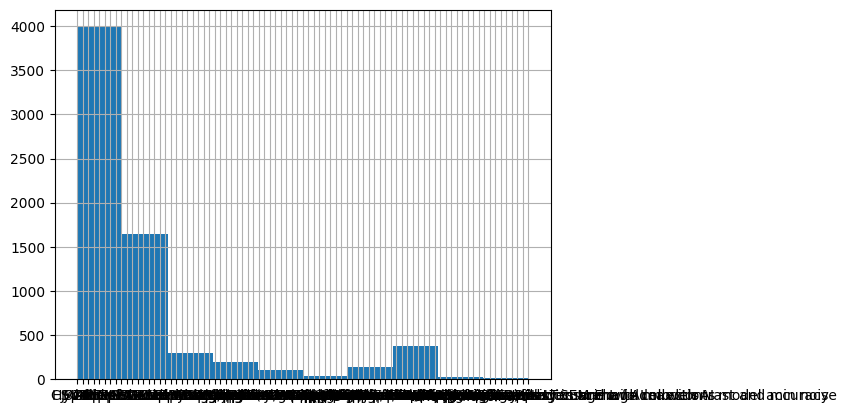

In [50]:
df['format'].hist()

# Bypassing Max Rows

In [ ]:
# File: /mnt/c/JakeDev/Portfolio/datalib_pg/api_test.ipynb
import time


def search_data(query: str = '', rows: int = 10, start: int = 0, include_drafts: bool = False, include_deleted: bool = False, include_private: bool = False):
    '''
    The Querying has a limit of 1000 rows per search which grealy limits our overall survey if the data from the site!
    
    Let's try to increase this!
    
    My thought process:
    - Allow the user to input a number greater than 1000
    - Divide the user's query into 1000-unit intervals.
    - For each interval, run each query and create it's own dataframe
    - Once all intervals are ran/recieved, merge dataframes together into one dataset.
    
    '''
    t=0
    dsets = {}
    for i in range(0, rows, 1000):
        
        if t > 0:
            time.sleep(1) # rate limiting to be ethical
        
        if rows-i >= 1000: # check to see if the last interval is less than 1000 (rows input is not cleanly divided by 1000)
            i_rows = f'&rows={i+1000}'
        else:
            i_rows = f'&rows={rows-i}'
        
        i_start = f'&start={i}'


        if query_sort == True:
            query = f'&q={query}'
        else:
            query = '&q=*:*'    # default value from documentation 
        include_drafts = f'&include_drafts={include_drafts}'
        include_deleted = f'&include_deleted={include_deleted}'
        include_private = f'&include_private={include_private}'
        request = requests.get(f'https://catalog.data.gov/api/3/action/package_search?{query}{i_rows}{i_start}{include_drafts}{include_deleted}{include_private}') # Contains all datasets with metadata for keywords, tags, etc.
        request_dict = request.json()


        for i, dset in enumerate(request_dict['result']['results']):
            for res in dset['resources']:
                if len(dsets) == 0:
                    dsets['name'] = [dset['name']]
                    dsets['format'] = [res['format']]
                    dsets['url'] = [res['url']]
                else:
                    dsets['name'].append(dset['name'])
                    dsets['format'].append(res['format'])
                    dsets['url'].append(res['url'])
            
        t += 1
    df = pd.DataFrame(dsets)
    return df

df = search_data(rows=20000)

In [173]:
df.describe()

,name,format,url
count,110640,110640,110640
unique,18478,407,81576
top,complex-document-information-processing-cdip-d...,,https://forum.earthdata.nasa.gov/app.php/tag/G...
freq,1315,31624,4557


In [163]:
df.shape

(110640, 3)

<Axes: >

) missing from font(s) DejaVu Sans./.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans./.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


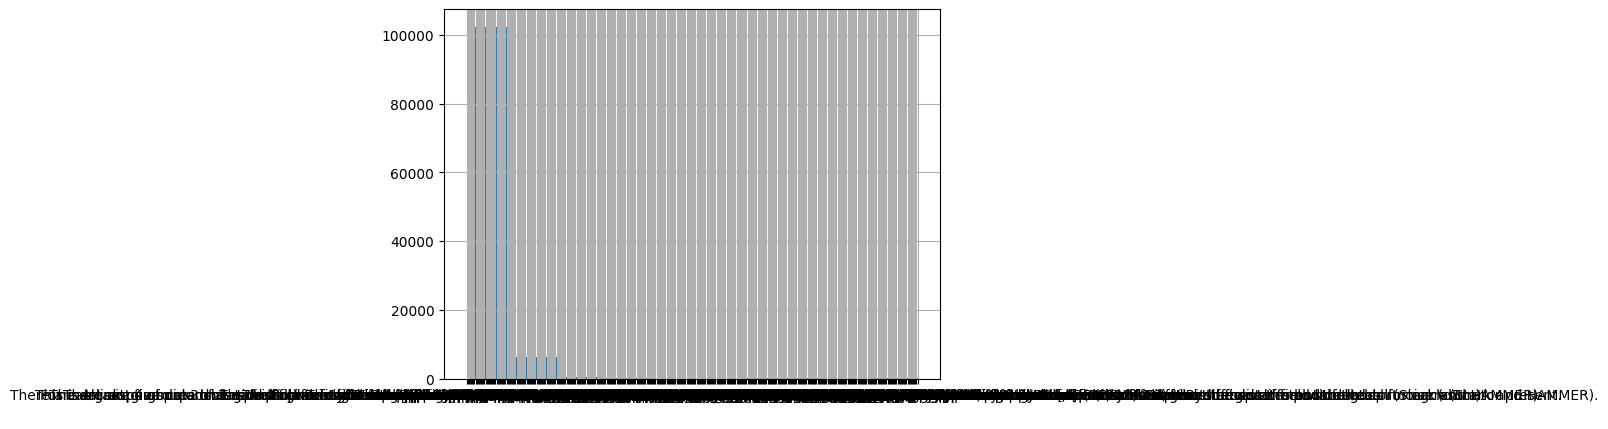

In [145]:
df['format'].hist()

In [146]:
df.to_csv('data/datasets.csv')

# Downloading and viewing a dataset

Would like this to be universal eventually, user can select what data they want then it auto-detects what type of file it is and handles it accordingly

In [ ]:
# for now, filtering down to csv files for convenience
# TODO: add other format support and eventually have a format selector

df[df['format'] == 'CSV']['name'].unique()

array(['electric-vehicle-population-data',
       'supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6',
       'border-crossing-entry-data-683ae', ...,
       'covid-19-vaccinations-by-week', 'open-storefronts-applications',
       'austin-green-business-leader-data'], shape=(5128,), dtype=object)

In [250]:
import io

url = df[df['name'] == 'electric-vehicle-population-data']['url'].iloc[0]

data = requests.get(url)

In [251]:
decoded_content = data.content.decode()
csv_file_like_object = io.StringIO(decoded_content)
dataset = pd.read_csv(csv_file_like_object)
dataset.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [ ]:
# Save if you want
dataset.to_csv('data/data.csv', index=False)

# Nice Summary Stats To Have

In [ ]:
# Shows how many nulls values in each feature
dataset.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 597
DOL Vehicle ID                                         0
Vehicle Location                                      16
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [253]:
# descriptive statistics of continuous variables
dataset.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,257627.000000,257635.000000,257632.000000,257632.000000,257038.000000,2.576350e+05,2.576270e+05
mean,98177.614217,2021.713164,43.127775,705.270541,28.897151,2.404009e+08,5.297530e+10
std,2535.922185,3.023857,81.632805,6997.364357,14.882168,6.602927e+07,1.597188e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.134322e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.586345e+08,5.303303e+10
75%,98380.000000,2024.000000,35.000000,0.000000,42.000000,2.738272e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


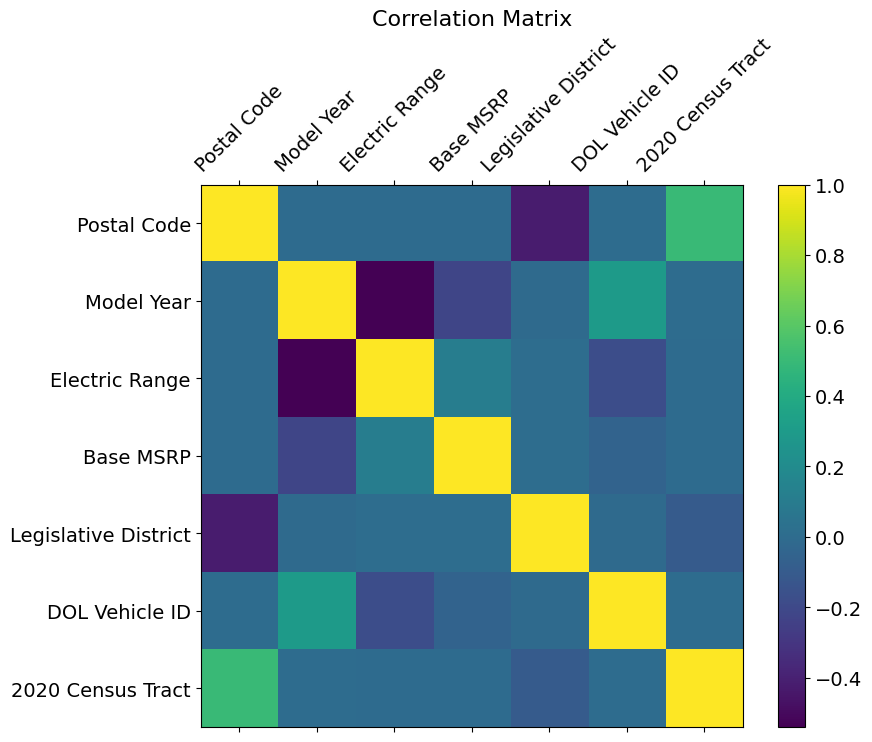

In [ ]:
import matplotlib.pyplot as plt


# Correlation Matrix
f = plt.figure(figsize=(9, 7))
plt.matshow(dataset.select_dtypes(include=['number']).corr(), fignum=f.number)
plt.xticks(range(dataset.select_dtypes(include=['number']).shape[1]), dataset.select_dtypes(include=['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.select_dtypes(include=['number']).shape[1]), dataset.select_dtypes(include=['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Model Year'}>,
        <Axes: title={'center': 'Electric Range'}>],
       [<Axes: title={'center': 'Base MSRP'}>,
        <Axes: title={'center': 'Legislative District'}>,
        <Axes: title={'center': 'DOL Vehicle ID'}>],
       [<Axes: title={'center': '2020 Census Tract'}>, <Axes: >,
        <Axes: >]], dtype=object)

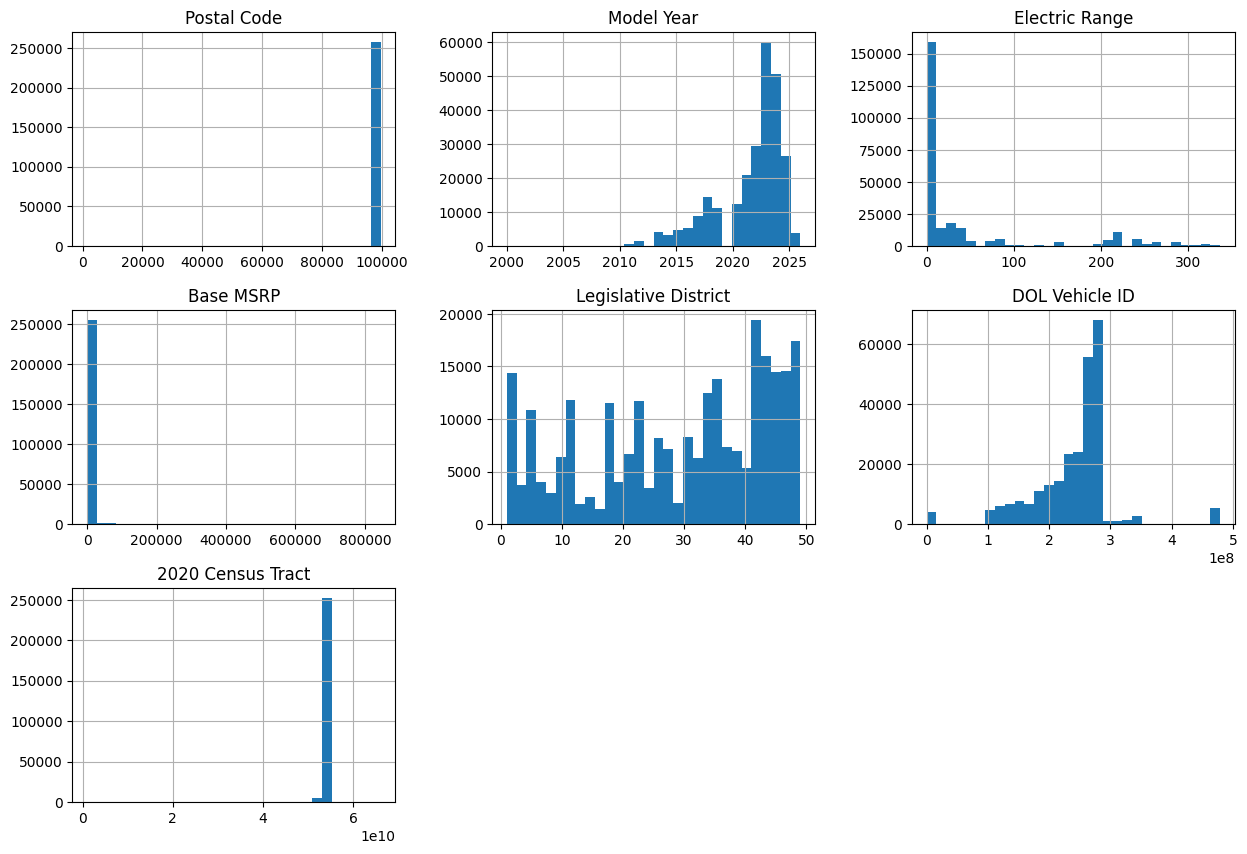

In [276]:
dataset.hist(bins=30, figsize=(15, 10))

In [290]:
#distribution of categorical values
for x in dataset.select_dtypes(exclude=["number"]).columns:
    print(dataset[[x]].value_counts())

VIN (1-10)
7SAYGDEE7P    1194
7SAYGDEE6P    1191
7SAYGDEEXP    1181
7SAYGDEE5P    1152
7SAYGDEE2P    1151
              ... 
ZHWUC1ZM8R       1
ZHWUC1ZM5R       1
ZHWUC1ZM3S       1
ZHWUC1ZM1R       1
ZFAFFAC4XR       1
Name: count, Length: 15513, dtype: int64
County      
King            128272
Snohomish        31810
Pierce           21314
Clark            15653
Thurston          9344
                 ...  
Wasco                1
Weld                 1
Williamsburg         1
Wise                 1
Yuba                 1
Name: count, Length: 226, dtype: int64
City       
Seattle        40534
Bellevue       12513
Vancouver       9529
Redmond         8847
Bothell         8491
               ...  
Abingdon           1
Alderdale          1
Wildomar           1
Westminster        1
Westfield          1
Name: count, Length: 830, dtype: int64
State
WA       257038
CA          144
VA           73
TX           35
MD           34
FL           28
CO           24
TN           17
OR           16
AZ